In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

print(df.shape)
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [3]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일(컴퓨터에게 모델 학습 조건을 알려줌)
model.compile(loss='binary_crossentropy',  # 오차 함수
          optimizer='adam',                # optimizer
          metrics=['accuracy'])            # 평가 지표

In [5]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):  # 모델 저장 경로가 없으면
    os.mkdir(MODEL_DIR)            # 디렉토리를 생성해라

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [6]:
# 모델 실행 및 학습 진행상황 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[checkpointer])

Epoch 1/3500
1/2 [==============>...............] - ETA: 0s - loss: 2.0372 - accuracy: 0.7280
Epoch 1: val_loss improved from inf to 1.36965, saving model to ./model\01-1.3696.hdf5
2/2 [==============================] - 1s 531ms/step - loss: 2.0482 - accuracy: 0.7259 - val_loss: 1.3696 - val_accuracy: 0.7547
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 1.7040 - accuracy: 0.7060
Epoch 2: val_loss improved from 1.36965 to 0.97676, saving model to ./model\02-0.9768.hdf5
2/2 [==============================] - 0s 187ms/step - loss: 1.5577 - accuracy: 0.7259 - val_loss: 0.9768 - val_accuracy: 0.7547
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 1.1309 - accuracy: 0.7340
Epoch 3: val_loss improved from 0.97676 to 0.65557, saving model to ./model\03-0.6556.hdf5
2/2 [==============================] - 0s 156ms/step - loss: 1.0864 - accuracy: 0.7259 - val_loss: 0.6556 - val_accuracy: 0.7547
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - 

1/2 [==============>...............] - ETA: 0s - loss: 0.3161 - accuracy: 0.9140
Epoch 28: val_loss improved from 0.29166 to 0.28358, saving model to ./model\28-0.2836.hdf5
2/2 [==============================] - 0s 228ms/step - loss: 0.3232 - accuracy: 0.9066 - val_loss: 0.2836 - val_accuracy: 0.8913
Epoch 29/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.3356 - accuracy: 0.8980
Epoch 29: val_loss improved from 0.28358 to 0.27803, saving model to ./model\29-0.2780.hdf5
2/2 [==============================] - 0s 424ms/step - loss: 0.3194 - accuracy: 0.9066 - val_loss: 0.2780 - val_accuracy: 0.8913
Epoch 30/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.3397 - accuracy: 0.9020
Epoch 30: val_loss improved from 0.27803 to 0.27361, saving model to ./model\30-0.2736.hdf5
2/2 [==============================] - 0s 224ms/step - loss: 0.3165 - accuracy: 0.9066 - val_loss: 0.2736 - val_accuracy: 0.8975
Epoch 31/3500
1/2 [==============>...............] - ETA: 0s - los

1/2 [==============>...............] - ETA: 0s - loss: 0.2497 - accuracy: 0.9260
Epoch 54: val_loss did not improve from 0.22255
2/2 [==============================] - 0s 111ms/step - loss: 0.2585 - accuracy: 0.9204 - val_loss: 0.2249 - val_accuracy: 0.9068
Epoch 55/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2596 - accuracy: 0.9200
Epoch 55: val_loss did not improve from 0.22255
2/2 [==============================] - 0s 156ms/step - loss: 0.2581 - accuracy: 0.9204 - val_loss: 0.2245 - val_accuracy: 0.9037
Epoch 56/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2611 - accuracy: 0.9220
Epoch 56: val_loss improved from 0.22255 to 0.22245, saving model to ./model\56-0.2224.hdf5
2/2 [==============================] - 0s 215ms/step - loss: 0.2569 - accuracy: 0.9188 - val_loss: 0.2224 - val_accuracy: 0.9068
Epoch 57/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2628 - accuracy: 0.9200
Epoch 57: val_loss improved from 0.22245 to 0.22078, saving

Epoch 83/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2494 - accuracy: 0.9220
Epoch 83: val_loss did not improve from 0.21438
2/2 [==============================] - 0s 63ms/step - loss: 0.2389 - accuracy: 0.9219 - val_loss: 0.2157 - val_accuracy: 0.9099
Epoch 84/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2496 - accuracy: 0.9160
Epoch 84: val_loss improved from 0.21438 to 0.21177, saving model to ./model\84-0.2118.hdf5
2/2 [==============================] - 0s 180ms/step - loss: 0.2378 - accuracy: 0.9234 - val_loss: 0.2118 - val_accuracy: 0.9130
Epoch 85/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2431 - accuracy: 0.9200
Epoch 85: val_loss improved from 0.21177 to 0.20936, saving model to ./model\85-0.2094.hdf5
2/2 [==============================] - 0s 186ms/step - loss: 0.2371 - accuracy: 0.9265 - val_loss: 0.2094 - val_accuracy: 0.9068
Epoch 86/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2608 - accuracy: 0.9200
Ep

2/2 [==============================] - 0s 75ms/step - loss: 0.2260 - accuracy: 0.9265 - val_loss: 0.2064 - val_accuracy: 0.9161
Epoch 112/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1975 - accuracy: 0.9360
Epoch 112: val_loss did not improve from 0.20333
2/2 [==============================] - 0s 81ms/step - loss: 0.2257 - accuracy: 0.9265 - val_loss: 0.2075 - val_accuracy: 0.9130
Epoch 113/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2314 - accuracy: 0.9220
Epoch 113: val_loss did not improve from 0.20333
2/2 [==============================] - 0s 54ms/step - loss: 0.2254 - accuracy: 0.9280 - val_loss: 0.2088 - val_accuracy: 0.9161
Epoch 114/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2345 - accuracy: 0.9280
Epoch 114: val_loss did not improve from 0.20333
2/2 [==============================] - 0s 47ms/step - loss: 0.2250 - accuracy: 0.9280 - val_loss: 0.2066 - val_accuracy: 0.9161
Epoch 115/3500
1/2 [==============>...............] -

Epoch 140/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1973 - accuracy: 0.9320
Epoch 140: val_loss did not improve from 0.19391
2/2 [==============================] - 0s 74ms/step - loss: 0.2143 - accuracy: 0.9265 - val_loss: 0.1946 - val_accuracy: 0.9161
Epoch 141/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2331 - accuracy: 0.9240
Epoch 141: val_loss did not improve from 0.19391
2/2 [==============================] - 0s 75ms/step - loss: 0.2128 - accuracy: 0.9280 - val_loss: 0.1984 - val_accuracy: 0.9130
Epoch 142/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2181 - accuracy: 0.9300
Epoch 142: val_loss did not improve from 0.19391
2/2 [==============================] - 0s 53ms/step - loss: 0.2117 - accuracy: 0.9280 - val_loss: 0.2019 - val_accuracy: 0.9193
Epoch 143/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2188 - accuracy: 0.9240
Epoch 143: val_loss did not improve from 0.19391
2/2 [==============================]

Epoch 169/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2168 - accuracy: 0.9180
Epoch 169: val_loss did not improve from 0.18801
2/2 [==============================] - 0s 86ms/step - loss: 0.2018 - accuracy: 0.9296 - val_loss: 0.1923 - val_accuracy: 0.9224
Epoch 170/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1858 - accuracy: 0.9340
Epoch 170: val_loss did not improve from 0.18801
2/2 [==============================] - 0s 48ms/step - loss: 0.2008 - accuracy: 0.9280 - val_loss: 0.1896 - val_accuracy: 0.9224
Epoch 171/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1839 - accuracy: 0.9320
Epoch 171: val_loss did not improve from 0.18801
2/2 [==============================] - 0s 53ms/step - loss: 0.2005 - accuracy: 0.9280 - val_loss: 0.1900 - val_accuracy: 0.9224
Epoch 172/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1821 - accuracy: 0.9300
Epoch 172: val_loss did not improve from 0.18801
2/2 [==============================]

Epoch 198/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1828 - accuracy: 0.9420
Epoch 198: val_loss did not improve from 0.17686
2/2 [==============================] - 0s 57ms/step - loss: 0.1881 - accuracy: 0.9342 - val_loss: 0.1873 - val_accuracy: 0.9410
Epoch 199/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2010 - accuracy: 0.9300
Epoch 199: val_loss did not improve from 0.17686
2/2 [==============================] - 0s 43ms/step - loss: 0.1903 - accuracy: 0.9372 - val_loss: 0.1849 - val_accuracy: 0.9348
Epoch 200/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1854 - accuracy: 0.9360
Epoch 200: val_loss did not improve from 0.17686
2/2 [==============================] - 0s 33ms/step - loss: 0.1893 - accuracy: 0.9342 - val_loss: 0.1780 - val_accuracy: 0.9348
Epoch 201/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1921 - accuracy: 0.9320
Epoch 201: val_loss improved from 0.17686 to 0.17570, saving model to ./model\201-0.1

2/2 [==============================] - 0s 85ms/step - loss: 0.1775 - accuracy: 0.9403 - val_loss: 0.1649 - val_accuracy: 0.9379
Epoch 227/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1818 - accuracy: 0.9360
Epoch 227: val_loss did not improve from 0.16495
2/2 [==============================] - 0s 94ms/step - loss: 0.1806 - accuracy: 0.9326 - val_loss: 0.1658 - val_accuracy: 0.9379
Epoch 228/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1841 - accuracy: 0.9380
Epoch 228: val_loss did not improve from 0.16495
2/2 [==============================] - 0s 38ms/step - loss: 0.1787 - accuracy: 0.9342 - val_loss: 0.1701 - val_accuracy: 0.9472
Epoch 229/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1581 - accuracy: 0.9500
Epoch 229: val_loss did not improve from 0.16495
2/2 [==============================] - 0s 96ms/step - loss: 0.1757 - accuracy: 0.9433 - val_loss: 0.1770 - val_accuracy: 0.9441
Epoch 230/3500
1/2 [==============>...............] -

1/2 [==============>...............] - ETA: 0s - loss: 0.1867 - accuracy: 0.9400
Epoch 255: val_loss did not improve from 0.15512
2/2 [==============================] - 0s 66ms/step - loss: 0.1645 - accuracy: 0.9510 - val_loss: 0.1559 - val_accuracy: 0.9441
Epoch 256/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1583 - accuracy: 0.9520
Epoch 256: val_loss did not improve from 0.15512
2/2 [==============================] - 0s 84ms/step - loss: 0.1633 - accuracy: 0.9510 - val_loss: 0.1572 - val_accuracy: 0.9503
Epoch 257/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1650 - accuracy: 0.9480
Epoch 257: val_loss did not improve from 0.15512
2/2 [==============================] - 0s 136ms/step - loss: 0.1627 - accuracy: 0.9510 - val_loss: 0.1584 - val_accuracy: 0.9503
Epoch 258/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1532 - accuracy: 0.9580
Epoch 258: val_loss did not improve from 0.15512
2/2 [==============================] - 0s 46ms/ste

Epoch 284/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1618 - accuracy: 0.9540
Epoch 284: val_loss did not improve from 0.14433
2/2 [==============================] - 0s 54ms/step - loss: 0.1524 - accuracy: 0.9541 - val_loss: 0.1475 - val_accuracy: 0.9596
Epoch 285/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1537 - accuracy: 0.9480
Epoch 285: val_loss improved from 0.14433 to 0.14403, saving model to ./model\285-0.1440.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.1512 - accuracy: 0.9510 - val_loss: 0.1440 - val_accuracy: 0.9472
Epoch 286/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1521 - accuracy: 0.9480
Epoch 286: val_loss did not improve from 0.14403
2/2 [==============================] - 0s 101ms/step - loss: 0.1502 - accuracy: 0.9510 - val_loss: 0.1475 - val_accuracy: 0.9565
Epoch 287/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1425 - accuracy: 0.9580
Epoch 287: val_loss did not improve fr

2/2 [==============================] - 0s 56ms/step - loss: 0.1419 - accuracy: 0.9510 - val_loss: 0.1436 - val_accuracy: 0.9565
Epoch 313/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1537 - accuracy: 0.9560
Epoch 313: val_loss did not improve from 0.13640
2/2 [==============================] - 0s 51ms/step - loss: 0.1420 - accuracy: 0.9617 - val_loss: 0.1532 - val_accuracy: 0.9565
Epoch 314/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1431 - accuracy: 0.9640
Epoch 314: val_loss did not improve from 0.13640
2/2 [==============================] - 0s 31ms/step - loss: 0.1426 - accuracy: 0.9648 - val_loss: 0.1382 - val_accuracy: 0.9596
Epoch 315/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1269 - accuracy: 0.9620
Epoch 315: val_loss improved from 0.13640 to 0.13524, saving model to ./model\315-0.1352.hdf5
2/2 [==============================] - 0s 92ms/step - loss: 0.1421 - accuracy: 0.9541 - val_loss: 0.1352 - val_accuracy: 0.9503
Epoch 31

2/2 [==============================] - 0s 69ms/step - loss: 0.1313 - accuracy: 0.9525 - val_loss: 0.1317 - val_accuracy: 0.9596
Epoch 342/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1332 - accuracy: 0.9580
Epoch 342: val_loss did not improve from 0.13046
2/2 [==============================] - 0s 45ms/step - loss: 0.1302 - accuracy: 0.9602 - val_loss: 0.1372 - val_accuracy: 0.9596
Epoch 343/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1404 - accuracy: 0.9600
Epoch 343: val_loss did not improve from 0.13046
2/2 [==============================] - 0s 38ms/step - loss: 0.1308 - accuracy: 0.9648 - val_loss: 0.1338 - val_accuracy: 0.9596
Epoch 344/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1258 - accuracy: 0.9600
Epoch 344: val_loss improved from 0.13046 to 0.12874, saving model to ./model\344-0.1287.hdf5
2/2 [==============================] - 0s 161ms/step - loss: 0.1290 - accuracy: 0.9632 - val_loss: 0.1287 - val_accuracy: 0.9596
Epoch 3

1/2 [==============>...............] - ETA: 0s - loss: 0.1315 - accuracy: 0.9640
Epoch 370: val_loss did not improve from 0.12320
2/2 [==============================] - 0s 31ms/step - loss: 0.1259 - accuracy: 0.9648 - val_loss: 0.1361 - val_accuracy: 0.9627
Epoch 371/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1264 - accuracy: 0.9700
Epoch 371: val_loss did not improve from 0.12320
2/2 [==============================] - 0s 41ms/step - loss: 0.1265 - accuracy: 0.9678 - val_loss: 0.1257 - val_accuracy: 0.9627
Epoch 372/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1116 - accuracy: 0.9700
Epoch 372: val_loss did not improve from 0.12320
2/2 [==============================] - 0s 37ms/step - loss: 0.1238 - accuracy: 0.9602 - val_loss: 0.1250 - val_accuracy: 0.9627
Epoch 373/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1234 - accuracy: 0.9600
Epoch 373: val_loss did not improve from 0.12320
2/2 [==============================] - 0s 47ms/step

2/2 [==============================] - 0s 108ms/step - loss: 0.1156 - accuracy: 0.9678 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 400/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1082 - accuracy: 0.9680
Epoch 400: val_loss did not improve from 0.11939
2/2 [==============================] - 0s 70ms/step - loss: 0.1158 - accuracy: 0.9632 - val_loss: 0.1197 - val_accuracy: 0.9627
Epoch 401/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1148 - accuracy: 0.9680
Epoch 401: val_loss did not improve from 0.11939
2/2 [==============================] - 0s 35ms/step - loss: 0.1140 - accuracy: 0.9678 - val_loss: 0.1278 - val_accuracy: 0.9596
Epoch 402/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1209 - accuracy: 0.9700
Epoch 402: val_loss did not improve from 0.11939
2/2 [==============================] - 0s 33ms/step - loss: 0.1163 - accuracy: 0.9724 - val_loss: 0.1244 - val_accuracy: 0.9627
Epoch 403/3500
1/2 [==============>...............] 

2/2 [==============================] - 0s 31ms/step - loss: 0.1083 - accuracy: 0.9694 - val_loss: 0.1231 - val_accuracy: 0.9627
Epoch 429/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1180 - accuracy: 0.9720
Epoch 429: val_loss did not improve from 0.11645
2/2 [==============================] - 0s 37ms/step - loss: 0.1104 - accuracy: 0.9740 - val_loss: 0.1223 - val_accuracy: 0.9627
Epoch 430/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1028 - accuracy: 0.9740
Epoch 430: val_loss did not improve from 0.11645
2/2 [==============================] - 0s 37ms/step - loss: 0.1117 - accuracy: 0.9678 - val_loss: 0.1172 - val_accuracy: 0.9627
Epoch 431/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1133 - accuracy: 0.9640
Epoch 431: val_loss did not improve from 0.11645
2/2 [==============================] - 0s 35ms/step - loss: 0.1098 - accuracy: 0.9663 - val_loss: 0.1171 - val_accuracy: 0.9627
Epoch 432/3500
1/2 [==============>...............] -

Epoch 458/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1111 - accuracy: 0.9660
Epoch 458: val_loss improved from 0.11253 to 0.11109, saving model to ./model\458-0.1111.hdf5
2/2 [==============================] - 0s 132ms/step - loss: 0.1035 - accuracy: 0.9709 - val_loss: 0.1111 - val_accuracy: 0.9627
Epoch 459/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0962 - accuracy: 0.9680
Epoch 459: val_loss did not improve from 0.11109
2/2 [==============================] - 0s 96ms/step - loss: 0.1046 - accuracy: 0.9663 - val_loss: 0.1117 - val_accuracy: 0.9627
Epoch 460/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1123 - accuracy: 0.9700
Epoch 460: val_loss did not improve from 0.11109
2/2 [==============================] - 0s 51ms/step - loss: 0.1039 - accuracy: 0.9724 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 461/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1158 - accuracy: 0.9660
Epoch 461: val_loss did not improve fro

Epoch 487/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1035 - accuracy: 0.9680
Epoch 487: val_loss did not improve from 0.10800
2/2 [==============================] - 0s 164ms/step - loss: 0.0988 - accuracy: 0.9709 - val_loss: 0.1092 - val_accuracy: 0.9627
Epoch 488/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1009 - accuracy: 0.9700
Epoch 488: val_loss did not improve from 0.10800
2/2 [==============================] - 0s 103ms/step - loss: 0.0992 - accuracy: 0.9709 - val_loss: 0.1114 - val_accuracy: 0.9658
Epoch 489/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0976 - accuracy: 0.9700
Epoch 489: val_loss did not improve from 0.10800
2/2 [==============================] - 0s 71ms/step - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.1080 - val_accuracy: 0.9627
Epoch 490/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1035 - accuracy: 0.9700
Epoch 490: val_loss improved from 0.10800 to 0.10798, saving model to ./model\490-0

2/2 [==============================] - 0s 34ms/step - loss: 0.0955 - accuracy: 0.9709 - val_loss: 0.1066 - val_accuracy: 0.9658
Epoch 517/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0998 - accuracy: 0.9680
Epoch 517: val_loss did not improve from 0.10642
2/2 [==============================] - 0s 31ms/step - loss: 0.0967 - accuracy: 0.9678 - val_loss: 0.1088 - val_accuracy: 0.9627
Epoch 518/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0966 - accuracy: 0.9720
Epoch 518: val_loss did not improve from 0.10642
2/2 [==============================] - 0s 33ms/step - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.1120 - val_accuracy: 0.9658
Epoch 519/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9800
Epoch 519: val_loss did not improve from 0.10642
2/2 [==============================] - 0s 32ms/step - loss: 0.0954 - accuracy: 0.9724 - val_loss: 0.1075 - val_accuracy: 0.9658
Epoch 520/3500
1/2 [==============>...............] -

Epoch 546/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0854 - accuracy: 0.9780
Epoch 546: val_loss did not improve from 0.10310
2/2 [==============================] - 0s 46ms/step - loss: 0.0915 - accuracy: 0.9755 - val_loss: 0.1056 - val_accuracy: 0.9658
Epoch 547/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1032 - accuracy: 0.9640
Epoch 547: val_loss improved from 0.10310 to 0.10257, saving model to ./model\547-0.1026.hdf5
2/2 [==============================] - 0s 153ms/step - loss: 0.0888 - accuracy: 0.9709 - val_loss: 0.1026 - val_accuracy: 0.9689
Epoch 548/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0888 - accuracy: 0.9700
Epoch 548: val_loss improved from 0.10257 to 0.10241, saving model to ./model\548-0.1024.hdf5
2/2 [==============================] - 0s 161ms/step - loss: 0.0936 - accuracy: 0.9678 - val_loss: 0.1024 - val_accuracy: 0.9689
Epoch 549/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0874 - accuracy: 

1/2 [==============>...............] - ETA: 0s - loss: 0.0839 - accuracy: 0.9740
Epoch 575: val_loss improved from 0.10145 to 0.09999, saving model to ./model\575-0.1000.hdf5
2/2 [==============================] - 0s 334ms/step - loss: 0.0858 - accuracy: 0.9755 - val_loss: 0.1000 - val_accuracy: 0.9658
Epoch 576/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0875 - accuracy: 0.9680
Epoch 576: val_loss did not improve from 0.09999
2/2 [==============================] - 0s 125ms/step - loss: 0.0862 - accuracy: 0.9709 - val_loss: 0.1030 - val_accuracy: 0.9658
Epoch 577/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0824 - accuracy: 0.9720
Epoch 577: val_loss did not improve from 0.09999
2/2 [==============================] - 0s 187ms/step - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.1090 - val_accuracy: 0.9596
Epoch 578/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1027 - accuracy: 0.9680
Epoch 578: val_loss did not improve from 0.09999
2/2

1/2 [==============>...............] - ETA: 0s - loss: 0.0876 - accuracy: 0.9760
Epoch 604: val_loss did not improve from 0.09879
2/2 [==============================] - 0s 40ms/step - loss: 0.0896 - accuracy: 0.9755 - val_loss: 0.1045 - val_accuracy: 0.9627
Epoch 605/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0831 - accuracy: 0.9760
Epoch 605: val_loss improved from 0.09879 to 0.09805, saving model to ./model\605-0.0981.hdf5
2/2 [==============================] - 0s 325ms/step - loss: 0.0831 - accuracy: 0.9755 - val_loss: 0.0981 - val_accuracy: 0.9689
Epoch 606/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0671 - accuracy: 0.9760
Epoch 606: val_loss did not improve from 0.09805
2/2 [==============================] - 1s 515ms/step - loss: 0.0823 - accuracy: 0.9724 - val_loss: 0.0986 - val_accuracy: 0.9658
Epoch 607/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0830 - accuracy: 0.9760
Epoch 607: val_loss did not improve from 0.09805
2/2 

2/2 [==============================] - 0s 216ms/step - loss: 0.0780 - accuracy: 0.9786 - val_loss: 0.0967 - val_accuracy: 0.9658
Epoch 634/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0781 - accuracy: 0.9740
Epoch 634: val_loss did not improve from 0.09669
2/2 [==============================] - 0s 176ms/step - loss: 0.0775 - accuracy: 0.9755 - val_loss: 0.0996 - val_accuracy: 0.9658
Epoch 635/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0647 - accuracy: 0.9820
Epoch 635: val_loss did not improve from 0.09669
2/2 [==============================] - 0s 44ms/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.1070 - val_accuracy: 0.9627
Epoch 636/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0817 - accuracy: 0.9720
Epoch 636: val_loss did not improve from 0.09669
2/2 [==============================] - 0s 42ms/step - loss: 0.0802 - accuracy: 0.9724 - val_loss: 0.1031 - val_accuracy: 0.9596
Epoch 637/3500
1/2 [==============>...............]

1/2 [==============>...............] - ETA: 0s - loss: 0.0623 - accuracy: 0.9820
Epoch 663: val_loss did not improve from 0.09525
2/2 [==============================] - 0s 86ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0966 - val_accuracy: 0.9658
Epoch 664/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0698 - accuracy: 0.9800
Epoch 664: val_loss did not improve from 0.09525
2/2 [==============================] - 0s 40ms/step - loss: 0.0730 - accuracy: 0.9786 - val_loss: 0.0995 - val_accuracy: 0.9627
Epoch 665/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0693 - accuracy: 0.9800
Epoch 665: val_loss did not improve from 0.09525
2/2 [==============================] - 0s 39ms/step - loss: 0.0735 - accuracy: 0.9770 - val_loss: 0.1003 - val_accuracy: 0.9658
Epoch 666/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0816 - accuracy: 0.9740
Epoch 666: val_loss did not improve from 0.09525
2/2 [==============================] - 0s 64ms/step

Epoch 693/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0850 - accuracy: 0.9700
Epoch 693: val_loss did not improve from 0.09328
2/2 [==============================] - 0s 68ms/step - loss: 0.0774 - accuracy: 0.9740 - val_loss: 0.0970 - val_accuracy: 0.9689
Epoch 694/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0735 - accuracy: 0.9740
Epoch 694: val_loss did not improve from 0.09328
2/2 [==============================] - 0s 74ms/step - loss: 0.0690 - accuracy: 0.9770 - val_loss: 0.0948 - val_accuracy: 0.9720
Epoch 695/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0650 - accuracy: 0.9720
Epoch 695: val_loss did not improve from 0.09328
2/2 [==============================] - 0s 85ms/step - loss: 0.0786 - accuracy: 0.9694 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 696/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0726 - accuracy: 0.9740
Epoch 696: val_loss did not improve from 0.09328
2/2 [==============================]

Epoch 723/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0688 - accuracy: 0.9760
Epoch 723: val_loss did not improve from 0.09250
2/2 [==============================] - 0s 67ms/step - loss: 0.0667 - accuracy: 0.9755 - val_loss: 0.0965 - val_accuracy: 0.9689
Epoch 724/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0621 - accuracy: 0.9760
Epoch 724: val_loss did not improve from 0.09250
2/2 [==============================] - 0s 40ms/step - loss: 0.0671 - accuracy: 0.9755 - val_loss: 0.0943 - val_accuracy: 0.9689
Epoch 725/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0648 - accuracy: 0.9760
Epoch 725: val_loss did not improve from 0.09250
2/2 [==============================] - 0s 39ms/step - loss: 0.0662 - accuracy: 0.9770 - val_loss: 0.0938 - val_accuracy: 0.9658
Epoch 726/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0648 - accuracy: 0.9820
Epoch 726: val_loss did not improve from 0.09250
2/2 [==============================]

Epoch 753/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0595 - accuracy: 0.9800
Epoch 753: val_loss did not improve from 0.09158
2/2 [==============================] - 0s 43ms/step - loss: 0.0631 - accuracy: 0.9786 - val_loss: 0.1008 - val_accuracy: 0.9720
Epoch 754/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0632 - accuracy: 0.9800
Epoch 754: val_loss did not improve from 0.09158
2/2 [==============================] - 0s 45ms/step - loss: 0.0692 - accuracy: 0.9755 - val_loss: 0.0975 - val_accuracy: 0.9720
Epoch 755/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0586 - accuracy: 0.9780
Epoch 755: val_loss improved from 0.09158 to 0.09152, saving model to ./model\755-0.0915.hdf5
2/2 [==============================] - 0s 122ms/step - loss: 0.0688 - accuracy: 0.9740 - val_loss: 0.0915 - val_accuracy: 0.9658
Epoch 756/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0668 - accuracy: 0.9800
Epoch 756: val_loss did not improve fro

2/2 [==============================] - 0s 66ms/step - loss: 0.0616 - accuracy: 0.9801 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 783/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0696 - accuracy: 0.9760
Epoch 783: val_loss did not improve from 0.09101
2/2 [==============================] - 0s 44ms/step - loss: 0.0631 - accuracy: 0.9786 - val_loss: 0.0996 - val_accuracy: 0.9689
Epoch 784/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0709 - accuracy: 0.9720
Epoch 784: val_loss did not improve from 0.09101
2/2 [==============================] - 0s 36ms/step - loss: 0.0649 - accuracy: 0.9770 - val_loss: 0.0919 - val_accuracy: 0.9689
Epoch 785/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0582 - accuracy: 0.9840
Epoch 785: val_loss did not improve from 0.09101
2/2 [==============================] - 0s 30ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0917 - val_accuracy: 0.9720
Epoch 786/3500
1/2 [==============>...............] -

1/2 [==============>...............] - ETA: 0s - loss: 0.0596 - accuracy: 0.9760
Epoch 812: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 47ms/step - loss: 0.0599 - accuracy: 0.9770 - val_loss: 0.0911 - val_accuracy: 0.9689
Epoch 813/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0608 - accuracy: 0.9760
Epoch 813: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 36ms/step - loss: 0.0582 - accuracy: 0.9801 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 814/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0423 - accuracy: 0.9840
Epoch 814: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 37ms/step - loss: 0.0576 - accuracy: 0.9786 - val_loss: 0.0948 - val_accuracy: 0.9752
Epoch 815/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0593 - accuracy: 0.9800
Epoch 815: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 34ms/step

1/2 [==============>...............] - ETA: 0s - loss: 0.0607 - accuracy: 0.9720
Epoch 842: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 50ms/step - loss: 0.0595 - accuracy: 0.9770 - val_loss: 0.0929 - val_accuracy: 0.9658
Epoch 843/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0646 - accuracy: 0.9760
Epoch 843: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 51ms/step - loss: 0.0617 - accuracy: 0.9770 - val_loss: 0.0916 - val_accuracy: 0.9689
Epoch 844/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 0.9840
Epoch 844: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 46ms/step - loss: 0.0577 - accuracy: 0.9801 - val_loss: 0.0996 - val_accuracy: 0.9814
Epoch 845/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0565 - accuracy: 0.9760
Epoch 845: val_loss did not improve from 0.09078
2/2 [==============================] - 0s 43ms/step

Epoch 872/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0684 - accuracy: 0.9740
Epoch 872: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0587 - accuracy: 0.9786 - val_loss: 0.0927 - val_accuracy: 0.9783
Epoch 873/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0577 - accuracy: 0.9740
Epoch 873: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0544 - accuracy: 0.9770 - val_loss: 0.0929 - val_accuracy: 0.9783
Epoch 874/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0597 - accuracy: 0.9740
Epoch 874: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 41ms/step - loss: 0.0545 - accuracy: 0.9770 - val_loss: 0.0908 - val_accuracy: 0.9720
Epoch 875/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0539 - accuracy: 0.9820
Epoch 875: val_loss did not improve from 0.08940
2/2 [==============================]

1/2 [==============>...............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9700
Epoch 902: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0512 - accuracy: 0.9770 - val_loss: 0.0931 - val_accuracy: 0.9689
Epoch 903/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0647 - accuracy: 0.9760
Epoch 903: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0549 - accuracy: 0.9801 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 904/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0508 - accuracy: 0.9840
Epoch 904: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0569 - accuracy: 0.9816 - val_loss: 0.0923 - val_accuracy: 0.9720
Epoch 905/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0471 - accuracy: 0.9800
Epoch 905: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step

1/2 [==============>...............] - ETA: 0s - loss: 0.0536 - accuracy: 0.9820
Epoch 932: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.0929 - val_accuracy: 0.9752
Epoch 933/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0549 - accuracy: 0.9820
Epoch 933: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0532 - accuracy: 0.9801 - val_loss: 0.0938 - val_accuracy: 0.9752
Epoch 934/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0528 - accuracy: 0.9780
Epoch 934: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0507 - accuracy: 0.9786 - val_loss: 0.0968 - val_accuracy: 0.9752
Epoch 935/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0613 - accuracy: 0.9720
Epoch 935: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step

1/2 [==============>...............] - ETA: 0s - loss: 0.0492 - accuracy: 0.9780
Epoch 962: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0501 - accuracy: 0.9801 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 963/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0519 - accuracy: 0.9820
Epoch 963: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0512 - accuracy: 0.9816 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 964/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9840
Epoch 964: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0484 - accuracy: 0.9816 - val_loss: 0.0968 - val_accuracy: 0.9752
Epoch 965/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0514 - accuracy: 0.9780
Epoch 965: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step

1/2 [==============>...............] - ETA: 0s - loss: 0.0493 - accuracy: 0.9820
Epoch 992: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0493 - accuracy: 0.9832 - val_loss: 0.0998 - val_accuracy: 0.9752
Epoch 993/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0457 - accuracy: 0.9820
Epoch 993: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0493 - accuracy: 0.9816 - val_loss: 0.0948 - val_accuracy: 0.9783
Epoch 994/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0480 - accuracy: 0.9820
Epoch 994: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0480 - accuracy: 0.9816 - val_loss: 0.0931 - val_accuracy: 0.9783
Epoch 995/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0475 - accuracy: 0.9840
Epoch 995: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step

Epoch 1022/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0524 - accuracy: 0.9740
Epoch 1022: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0455 - accuracy: 0.9786 - val_loss: 0.0960 - val_accuracy: 0.9752
Epoch 1023/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0440 - accuracy: 0.9840
Epoch 1023: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0447 - accuracy: 0.9816 - val_loss: 0.0948 - val_accuracy: 0.9752
Epoch 1024/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0441 - accuracy: 0.9860
Epoch 1024: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0451 - accuracy: 0.9832 - val_loss: 0.0946 - val_accuracy: 0.9752
Epoch 1025/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 0.9820
Epoch 1025: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1052/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0520 - accuracy: 0.9760
Epoch 1052: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0459 - accuracy: 0.9801 - val_loss: 0.0969 - val_accuracy: 0.9814
Epoch 1053/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0537 - accuracy: 0.9780
Epoch 1053: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0465 - accuracy: 0.9816 - val_loss: 0.0930 - val_accuracy: 0.9814
Epoch 1054/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0432 - accuracy: 0.9840
Epoch 1054: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0459 - accuracy: 0.9816 - val_loss: 0.0930 - val_accuracy: 0.9814
Epoch 1055/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0456 - accuracy: 0.9800
Epoch 1055: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1082/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0516 - accuracy: 0.9800
Epoch 1082: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.0969 - val_accuracy: 0.9814
Epoch 1083/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0454 - accuracy: 0.9760
Epoch 1083: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0442 - accuracy: 0.9786 - val_loss: 0.0957 - val_accuracy: 0.9752
Epoch 1084/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0566 - accuracy: 0.9800
Epoch 1084: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0523 - accuracy: 0.9832 - val_loss: 0.0949 - val_accuracy: 0.9752
Epoch 1085/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0578 - accuracy: 0.9800
Epoch 1085: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1112/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335 - accuracy: 0.9900
Epoch 1112: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 49ms/step - loss: 0.0417 - accuracy: 0.9862 - val_loss: 0.0958 - val_accuracy: 0.9814
Epoch 1113/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0384 - accuracy: 0.9820
Epoch 1113: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0417 - accuracy: 0.9832 - val_loss: 0.0981 - val_accuracy: 0.9783
Epoch 1114/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0314 - accuracy: 0.9860
Epoch 1114: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 48ms/step - loss: 0.0418 - accuracy: 0.9832 - val_loss: 0.1026 - val_accuracy: 0.9783
Epoch 1115/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0390 - accuracy: 0.9860
Epoch 1115: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1142/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9840
Epoch 1142: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0403 - accuracy: 0.9847 - val_loss: 0.1007 - val_accuracy: 0.9783
Epoch 1143/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0391 - accuracy: 0.9860
Epoch 1143: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0433 - accuracy: 0.9832 - val_loss: 0.0941 - val_accuracy: 0.9752
Epoch 1144/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - accuracy: 0.9860
Epoch 1144: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 1145/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0521 - accuracy: 0.9800
Epoch 1145: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1172/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0370 - accuracy: 0.9880
Epoch 1172: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.1080 - val_accuracy: 0.9783
Epoch 1173/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0413 - accuracy: 0.9860
Epoch 1173: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0467 - accuracy: 0.9832 - val_loss: 0.0958 - val_accuracy: 0.9783
Epoch 1174/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0402 - accuracy: 0.9840
Epoch 1174: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0384 - accuracy: 0.9862 - val_loss: 0.0948 - val_accuracy: 0.9783
Epoch 1175/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0516 - accuracy: 0.9780
Epoch 1175: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1202/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0366 - accuracy: 0.9900
Epoch 1202: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0385 - accuracy: 0.9862 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1203/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0356 - accuracy: 0.9860
Epoch 1203: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0372 - accuracy: 0.9847 - val_loss: 0.1004 - val_accuracy: 0.9783
Epoch 1204/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0406 - accuracy: 0.9820
Epoch 1204: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0402 - accuracy: 0.9832 - val_loss: 0.0973 - val_accuracy: 0.9783
Epoch 1205/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0332 - accuracy: 0.9900
Epoch 1205: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1232/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0340 - accuracy: 0.9880
Epoch 1232: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 41ms/step - loss: 0.0380 - accuracy: 0.9862 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 1233/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0282 - accuracy: 0.9880
Epoch 1233: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0366 - accuracy: 0.9847 - val_loss: 0.1007 - val_accuracy: 0.9814
Epoch 1234/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0448 - accuracy: 0.9780
Epoch 1234: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 52ms/step - loss: 0.0396 - accuracy: 0.9832 - val_loss: 0.0968 - val_accuracy: 0.9783
Epoch 1235/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0412 - accuracy: 0.9840
Epoch 1235: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1262/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0394 - accuracy: 0.9840
Epoch 1262: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0359 - accuracy: 0.9847 - val_loss: 0.0982 - val_accuracy: 0.9814
Epoch 1263/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0353 - accuracy: 0.9840
Epoch 1263: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0360 - accuracy: 0.9847 - val_loss: 0.0962 - val_accuracy: 0.9814
Epoch 1264/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0381 - accuracy: 0.9860
Epoch 1264: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 60ms/step - loss: 0.0364 - accuracy: 0.9862 - val_loss: 0.0953 - val_accuracy: 0.9783
Epoch 1265/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0350 - accuracy: 0.9880
Epoch 1265: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1292/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0366 - accuracy: 0.9860
Epoch 1292: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0345 - accuracy: 0.9862 - val_loss: 0.0967 - val_accuracy: 0.9783
Epoch 1293/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0301 - accuracy: 0.9900
Epoch 1293: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.0956 - val_accuracy: 0.9752
Epoch 1294/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0354 - accuracy: 0.9900
Epoch 1294: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 0.0955 - val_accuracy: 0.9752
Epoch 1295/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378 - accuracy: 0.9840
Epoch 1295: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1322/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9820
Epoch 1322: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0985 - val_accuracy: 0.9783
Epoch 1323/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0468 - accuracy: 0.9780
Epoch 1323: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0415 - accuracy: 0.9816 - val_loss: 0.0993 - val_accuracy: 0.9783
Epoch 1324/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0397 - accuracy: 0.9860
Epoch 1324: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0412 - accuracy: 0.9847 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 1325/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0240 - accuracy: 0.9900
Epoch 1325: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1352/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0387 - accuracy: 0.9840
Epoch 1352: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0339 - accuracy: 0.9877 - val_loss: 0.0971 - val_accuracy: 0.9783
Epoch 1353/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0392 - accuracy: 0.9840
Epoch 1353: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0368 - accuracy: 0.9847 - val_loss: 0.0961 - val_accuracy: 0.9783
Epoch 1354/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0307 - accuracy: 0.9860
Epoch 1354: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0341 - accuracy: 0.9862 - val_loss: 0.0988 - val_accuracy: 0.9783
Epoch 1355/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0313 - accuracy: 0.9860
Epoch 1355: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1382/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0300 - accuracy: 0.9880
Epoch 1382: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0311 - accuracy: 0.9877 - val_loss: 0.0971 - val_accuracy: 0.9752
Epoch 1383/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0342 - accuracy: 0.9860
Epoch 1383: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0323 - accuracy: 0.9877 - val_loss: 0.0971 - val_accuracy: 0.9783
Epoch 1384/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0279 - accuracy: 0.9900
Epoch 1384: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 30ms/step - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.1003 - val_accuracy: 0.9783
Epoch 1385/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0248 - accuracy: 0.9920
Epoch 1385: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1412/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0370 - accuracy: 0.9840
Epoch 1412: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0319 - accuracy: 0.9877 - val_loss: 0.0971 - val_accuracy: 0.9783
Epoch 1413/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0384 - accuracy: 0.9820
Epoch 1413: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0321 - accuracy: 0.9862 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 1414/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0308 - accuracy: 0.9880
Epoch 1414: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0305 - accuracy: 0.9877 - val_loss: 0.0975 - val_accuracy: 0.9783
Epoch 1415/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 0.9880
Epoch 1415: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1442/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0272 - accuracy: 0.9920
Epoch 1442: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0311 - accuracy: 0.9893 - val_loss: 0.0969 - val_accuracy: 0.9814
Epoch 1443/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0397 - accuracy: 0.9840
Epoch 1443: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0342 - accuracy: 0.9862 - val_loss: 0.0961 - val_accuracy: 0.9814
Epoch 1444/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - accuracy: 0.9940
Epoch 1444: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0310 - accuracy: 0.9862 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 1445/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0318 - accuracy: 0.9880
Epoch 1445: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1472/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0265 - accuracy: 0.9900
Epoch 1472: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0302 - accuracy: 0.9893 - val_loss: 0.1025 - val_accuracy: 0.9783
Epoch 1473/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0298 - accuracy: 0.9900
Epoch 1473: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0299 - accuracy: 0.9893 - val_loss: 0.0998 - val_accuracy: 0.9783
Epoch 1474/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0257 - accuracy: 0.9900
Epoch 1474: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0316 - accuracy: 0.9877 - val_loss: 0.0990 - val_accuracy: 0.9814
Epoch 1475/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0288 - accuracy: 0.9880
Epoch 1475: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1502/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - accuracy: 0.9920
Epoch 1502: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0968 - val_accuracy: 0.9783
Epoch 1503/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0296 - accuracy: 0.9900
Epoch 1503: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0305 - accuracy: 0.9893 - val_loss: 0.0965 - val_accuracy: 0.9783
Epoch 1504/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0306 - accuracy: 0.9900
Epoch 1504: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.1011 - val_accuracy: 0.9814
Epoch 1505/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0277 - accuracy: 0.9920
Epoch 1505: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1532/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 0.9920
Epoch 1532: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 41ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0990 - val_accuracy: 0.9752
Epoch 1533/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0261 - accuracy: 0.9920
Epoch 1533: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0966 - val_accuracy: 0.9783
Epoch 1534/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0215 - accuracy: 0.9940
Epoch 1534: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0271 - accuracy: 0.9923 - val_loss: 0.0952 - val_accuracy: 0.9814
Epoch 1535/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0296 - accuracy: 0.9880
Epoch 1535: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1562/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0250 - accuracy: 0.9900
Epoch 1562: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0267 - accuracy: 0.9877 - val_loss: 0.1059 - val_accuracy: 0.9814
Epoch 1563/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0348 - accuracy: 0.9840
Epoch 1563: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0306 - accuracy: 0.9877 - val_loss: 0.1005 - val_accuracy: 0.9783
Epoch 1564/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0248 - accuracy: 0.9880
Epoch 1564: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0278 - accuracy: 0.9877 - val_loss: 0.0975 - val_accuracy: 0.9814
Epoch 1565/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9960
Epoch 1565: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1592/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0328 - accuracy: 0.9860
Epoch 1592: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0300 - accuracy: 0.9862 - val_loss: 0.0992 - val_accuracy: 0.9814
Epoch 1593/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 0.9860
Epoch 1593: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0285 - accuracy: 0.9862 - val_loss: 0.1002 - val_accuracy: 0.9783
Epoch 1594/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0265 - accuracy: 0.9920
Epoch 1594: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.1034 - val_accuracy: 0.9752
Epoch 1595/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284 - accuracy: 0.9900
Epoch 1595: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1622/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0235 - accuracy: 0.9920
Epoch 1622: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.1060 - val_accuracy: 0.9814
Epoch 1623/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0323 - accuracy: 0.9840
Epoch 1623: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0295 - accuracy: 0.9862 - val_loss: 0.1026 - val_accuracy: 0.9783
Epoch 1624/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0276 - accuracy: 0.9860
Epoch 1624: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0282 - accuracy: 0.9862 - val_loss: 0.0979 - val_accuracy: 0.9783
Epoch 1625/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303 - accuracy: 0.9880
Epoch 1625: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1652/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0282 - accuracy: 0.9900
Epoch 1652: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0250 - accuracy: 0.9908 - val_loss: 0.0991 - val_accuracy: 0.9814
Epoch 1653/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0227 - accuracy: 0.9900
Epoch 1653: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 237ms/step - loss: 0.0238 - accuracy: 0.9893 - val_loss: 0.1002 - val_accuracy: 0.9814
Epoch 1654/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0278 - accuracy: 0.9940
Epoch 1654: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 263ms/step - loss: 0.0235 - accuracy: 0.9939 - val_loss: 0.1006 - val_accuracy: 0.9814
Epoch 1655/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0228 - accuracy: 0.9940
Epoch 1655: val_loss did not improve from 0.08940
2/2 [=====================

Epoch 1682/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0194 - accuracy: 0.9960
Epoch 1682: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 47ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0997 - val_accuracy: 0.9814
Epoch 1683/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0217 - accuracy: 0.9920
Epoch 1683: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 62ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0994 - val_accuracy: 0.9814
Epoch 1684/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0218 - accuracy: 0.9920
Epoch 1684: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 63ms/step - loss: 0.0233 - accuracy: 0.9893 - val_loss: 0.1001 - val_accuracy: 0.9814
Epoch 1685/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0229 - accuracy: 0.9920
Epoch 1685: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1712/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0207 - accuracy: 0.9920
Epoch 1712: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.1001 - val_accuracy: 0.9814
Epoch 1713/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0202 - accuracy: 0.9960
Epoch 1713: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.1003 - val_accuracy: 0.9814
Epoch 1714/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0244 - accuracy: 0.9900
Epoch 1714: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0230 - accuracy: 0.9908 - val_loss: 0.1006 - val_accuracy: 0.9845
Epoch 1715/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0200 - accuracy: 0.9940
Epoch 1715: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1742/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0343 - accuracy: 0.9840
Epoch 1742: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 47ms/step - loss: 0.0294 - accuracy: 0.9877 - val_loss: 0.1032 - val_accuracy: 0.9814
Epoch 1743/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0245 - accuracy: 0.9860
Epoch 1743: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0233 - accuracy: 0.9893 - val_loss: 0.1071 - val_accuracy: 0.9783
Epoch 1744/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0286 - accuracy: 0.9900
Epoch 1744: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 55ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.1044 - val_accuracy: 0.9783
Epoch 1745/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0240 - accuracy: 0.9940
Epoch 1745: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1772/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - accuracy: 0.9900
Epoch 1772: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 62ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.1034 - val_accuracy: 0.9814
Epoch 1773/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0233 - accuracy: 0.9900
Epoch 1773: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0249 - accuracy: 0.9862 - val_loss: 0.1019 - val_accuracy: 0.9845
Epoch 1774/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221 - accuracy: 0.9900
Epoch 1774: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 47ms/step - loss: 0.0229 - accuracy: 0.9893 - val_loss: 0.1018 - val_accuracy: 0.9814
Epoch 1775/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303 - accuracy: 0.9880
Epoch 1775: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1802/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0256 - accuracy: 0.9940
Epoch 1802: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 62ms/step - loss: 0.0217 - accuracy: 0.9954 - val_loss: 0.1014 - val_accuracy: 0.9814
Epoch 1803/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0235 - accuracy: 0.9940
Epoch 1803: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 60ms/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.1016 - val_accuracy: 0.9814
Epoch 1804/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0212 - accuracy: 0.9960
Epoch 1804: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 85ms/step - loss: 0.0206 - accuracy: 0.9969 - val_loss: 0.1026 - val_accuracy: 0.9814
Epoch 1805/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0252 - accuracy: 0.9900
Epoch 1805: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1832/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0174 - accuracy: 0.9960
Epoch 1832: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 120ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.1042 - val_accuracy: 0.9783
Epoch 1833/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - accuracy: 0.9920
Epoch 1833: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 127ms/step - loss: 0.0207 - accuracy: 0.9908 - val_loss: 0.1046 - val_accuracy: 0.9783
Epoch 1834/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0201 - accuracy: 0.9980
Epoch 1834: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 60ms/step - loss: 0.0197 - accuracy: 0.9969 - val_loss: 0.1036 - val_accuracy: 0.9783
Epoch 1835/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221 - accuracy: 0.9940
Epoch 1835: val_loss did not improve from 0.08940
2/2 [=====================

Epoch 1862/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0148 - accuracy: 0.9980
Epoch 1862: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.1078 - val_accuracy: 0.9783
Epoch 1863/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9940
Epoch 1863: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0231 - accuracy: 0.9893 - val_loss: 0.1046 - val_accuracy: 0.9783
Epoch 1864/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0199 - accuracy: 0.9920
Epoch 1864: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.1063 - val_accuracy: 0.9752
Epoch 1865/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0215 - accuracy: 0.9940
Epoch 1865: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1892/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0160 - accuracy: 0.9960
Epoch 1892: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0192 - accuracy: 0.9954 - val_loss: 0.1086 - val_accuracy: 0.9783
Epoch 1893/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0236 - accuracy: 0.9940
Epoch 1893: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.1069 - val_accuracy: 0.9783
Epoch 1894/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 1894: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.1069 - val_accuracy: 0.9783
Epoch 1895/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - accuracy: 0.9960
Epoch 1895: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1922/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0235 - accuracy: 0.9940
Epoch 1922: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.1067 - val_accuracy: 0.9783
Epoch 1923/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - accuracy: 1.0000
Epoch 1923: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0160 - accuracy: 0.9985 - val_loss: 0.1135 - val_accuracy: 0.9814
Epoch 1924/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9920
Epoch 1924: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0231 - accuracy: 0.9893 - val_loss: 0.1084 - val_accuracy: 0.9783
Epoch 1925/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - accuracy: 0.9960
Epoch 1925: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1952/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - accuracy: 0.9960
Epoch 1952: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.1210 - val_accuracy: 0.9689
Epoch 1953/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0300 - accuracy: 0.9860
Epoch 1953: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0264 - accuracy: 0.9893 - val_loss: 0.1064 - val_accuracy: 0.9752
Epoch 1954/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0211 - accuracy: 0.9960
Epoch 1954: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.1111 - val_accuracy: 0.9814
Epoch 1955/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0310 - accuracy: 0.9860
Epoch 1955: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 1982/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0134 - accuracy: 0.9980
Epoch 1982: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.1079 - val_accuracy: 0.9783
Epoch 1983/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - accuracy: 0.9980
Epoch 1983: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0153 - accuracy: 0.9985 - val_loss: 0.1099 - val_accuracy: 0.9814
Epoch 1984/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9940
Epoch 1984: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 51ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.1102 - val_accuracy: 0.9814
Epoch 1985/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0207 - accuracy: 0.9940
Epoch 1985: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2012/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9960
Epoch 2012: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0185 - accuracy: 0.9954 - val_loss: 0.1077 - val_accuracy: 0.9814
Epoch 2013/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137 - accuracy: 0.9980
Epoch 2013: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.1104 - val_accuracy: 0.9783
Epoch 2014/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0147 - accuracy: 0.9960
Epoch 2014: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.1094 - val_accuracy: 0.9783
Epoch 2015/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163 - accuracy: 0.9960
Epoch 2015: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2042/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 2042: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0145 - accuracy: 0.9985 - val_loss: 0.1120 - val_accuracy: 0.9783
Epoch 2043/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0152 - accuracy: 0.9980
Epoch 2043: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0181 - accuracy: 0.9954 - val_loss: 0.1119 - val_accuracy: 0.9814
Epoch 2044/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0153 - accuracy: 0.9940
Epoch 2044: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.1101 - val_accuracy: 0.9814
Epoch 2045/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0176 - accuracy: 0.9940
Epoch 2045: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2072/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111 - accuracy: 0.9980
Epoch 2072: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.1135 - val_accuracy: 0.9783
Epoch 2073/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0157 - accuracy: 0.9980
Epoch 2073: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0135 - accuracy: 0.9985 - val_loss: 0.1136 - val_accuracy: 0.9814
Epoch 2074/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162 - accuracy: 0.9940
Epoch 2074: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.1132 - val_accuracy: 0.9814
Epoch 2075/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138 - accuracy: 0.9960
Epoch 2075: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2102/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0159 - accuracy: 0.9960
Epoch 2102: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.1107 - val_accuracy: 0.9783
Epoch 2103/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - accuracy: 0.9980
Epoch 2103: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1108 - val_accuracy: 0.9814
Epoch 2104/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0148 - accuracy: 0.9960
Epoch 2104: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.1103 - val_accuracy: 0.9814
Epoch 2105/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142 - accuracy: 0.9940
Epoch 2105: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2132/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165 - accuracy: 0.9960
Epoch 2132: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.1148 - val_accuracy: 0.9814
Epoch 2133/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0167 - accuracy: 0.9960
Epoch 2133: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 53ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.1158 - val_accuracy: 0.9814
Epoch 2134/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - accuracy: 1.0000
Epoch 2134: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0149 - accuracy: 0.9969 - val_loss: 0.1165 - val_accuracy: 0.9814
Epoch 2135/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - accuracy: 0.9940
Epoch 2135: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2162/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0139 - accuracy: 0.9980
Epoch 2162: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.1131 - val_accuracy: 0.9783
Epoch 2163/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - accuracy: 0.9980
Epoch 2163: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 30ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.1131 - val_accuracy: 0.9814
Epoch 2164/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0143 - accuracy: 0.9980
Epoch 2164: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0129 - accuracy: 0.9985 - val_loss: 0.1132 - val_accuracy: 0.9814
Epoch 2165/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 2165: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2192/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - accuracy: 0.9940
Epoch 2192: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 55ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.1157 - val_accuracy: 0.9814
Epoch 2193/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0139 - accuracy: 0.9940
Epoch 2193: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 60ms/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.1153 - val_accuracy: 0.9814
Epoch 2194/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137 - accuracy: 0.9980
Epoch 2194: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 56ms/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 0.1155 - val_accuracy: 0.9814
Epoch 2195/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0130 - accuracy: 0.9980
Epoch 2195: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2222/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0154 - accuracy: 0.9960
Epoch 2222: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.1154 - val_accuracy: 0.9845
Epoch 2223/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146 - accuracy: 0.9940
Epoch 2223: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 48ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.1172 - val_accuracy: 0.9814
Epoch 2224/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - accuracy: 0.9980
Epoch 2224: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0132 - accuracy: 0.9985 - val_loss: 0.1151 - val_accuracy: 0.9814
Epoch 2225/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - accuracy: 0.9980
Epoch 2225: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2252/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0084 - accuracy: 1.0000
Epoch 2252: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 47ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1204 - val_accuracy: 0.9814
Epoch 2253/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162 - accuracy: 0.9960
Epoch 2253: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0153 - accuracy: 0.9969 - val_loss: 0.1158 - val_accuracy: 0.9783
Epoch 2254/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0168 - accuracy: 0.9960
Epoch 2254: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.1191 - val_accuracy: 0.9783
Epoch 2255/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9940
Epoch 2255: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2282/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114 - accuracy: 0.9960
Epoch 2282: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.1157 - val_accuracy: 0.9814
Epoch 2283/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117 - accuracy: 0.9980
Epoch 2283: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.1160 - val_accuracy: 0.9814
Epoch 2284/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - accuracy: 0.9980
Epoch 2284: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.1164 - val_accuracy: 0.9814
Epoch 2285/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - accuracy: 0.9980
Epoch 2285: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2312/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112 - accuracy: 0.9960
Epoch 2312: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 52ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.1188 - val_accuracy: 0.9814
Epoch 2313/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 2313: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.1184 - val_accuracy: 0.9814
Epoch 2314/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 1.0000
Epoch 2314: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.1189 - val_accuracy: 0.9814
Epoch 2315/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - accuracy: 0.9960
Epoch 2315: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2342/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0125 - accuracy: 0.9980
Epoch 2342: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.1220 - val_accuracy: 0.9783
Epoch 2343/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0169 - accuracy: 0.9940
Epoch 2343: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0158 - accuracy: 0.9939 - val_loss: 0.1182 - val_accuracy: 0.9814
Epoch 2344/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - accuracy: 0.9980
Epoch 2344: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1180 - val_accuracy: 0.9783
Epoch 2345/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118 - accuracy: 0.9960
Epoch 2345: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2372/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106 - accuracy: 0.9980
Epoch 2372: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.1223 - val_accuracy: 0.9783
Epoch 2373/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136 - accuracy: 0.9960
Epoch 2373: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.1210 - val_accuracy: 0.9814
Epoch 2374/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - accuracy: 0.9960
Epoch 2374: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1233 - val_accuracy: 0.9845
Epoch 2375/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124 - accuracy: 0.9960
Epoch 2375: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2402/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - accuracy: 0.9940
Epoch 2402: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0098 - accuracy: 0.9954 - val_loss: 0.1232 - val_accuracy: 0.9783
Epoch 2403/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960
Epoch 2403: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 47ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.1231 - val_accuracy: 0.9783
Epoch 2404/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - accuracy: 0.9980
Epoch 2404: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.1226 - val_accuracy: 0.9814
Epoch 2405/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - accuracy: 0.9960
Epoch 2405: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2432/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 0.9980
Epoch 2432: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.1241 - val_accuracy: 0.9814
Epoch 2433/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - accuracy: 0.9980
Epoch 2433: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0090 - accuracy: 0.9985 - val_loss: 0.1231 - val_accuracy: 0.9814
Epoch 2434/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 1.0000
Epoch 2434: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.1236 - val_accuracy: 0.9814
Epoch 2435/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - accuracy: 0.9980
Epoch 2435: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2462/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0122 - accuracy: 0.9980
Epoch 2462: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1258 - val_accuracy: 0.9783
Epoch 2463/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - accuracy: 0.9980
Epoch 2463: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 41ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.1312 - val_accuracy: 0.9783
Epoch 2464/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0158 - accuracy: 0.9940
Epoch 2464: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1251 - val_accuracy: 0.9814
Epoch 2465/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0089 - accuracy: 0.9980
Epoch 2465: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2492/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - accuracy: 0.9980
Epoch 2492: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1264 - val_accuracy: 0.9814
Epoch 2493/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - accuracy: 0.9980
Epoch 2493: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.1280 - val_accuracy: 0.9845
Epoch 2494/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - accuracy: 0.9980
Epoch 2494: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.1276 - val_accuracy: 0.9845
Epoch 2495/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - accuracy: 0.9960
Epoch 2495: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2522/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115 - accuracy: 0.9980
Epoch 2522: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.1292 - val_accuracy: 0.9814
Epoch 2523/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - accuracy: 0.9980
Epoch 2523: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.1293 - val_accuracy: 0.9783
Epoch 2524/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - accuracy: 0.9980
Epoch 2524: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.1290 - val_accuracy: 0.9783
Epoch 2525/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 2525: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2552/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 0.9980
Epoch 2552: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0101 - accuracy: 0.9954 - val_loss: 0.1271 - val_accuracy: 0.9814
Epoch 2553/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107 - accuracy: 0.9960
Epoch 2553: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 77ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.1310 - val_accuracy: 0.9752
Epoch 2554/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0122 - accuracy: 0.9960
Epoch 2554: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 66ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.1274 - val_accuracy: 0.9783
Epoch 2555/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - accuracy: 0.9980
Epoch 2555: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2582/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - accuracy: 0.9980
Epoch 2582: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1300 - val_accuracy: 0.9845
Epoch 2583/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 1.0000
Epoch 2583: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.1348 - val_accuracy: 0.9752
Epoch 2584/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110 - accuracy: 0.9980
Epoch 2584: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.1288 - val_accuracy: 0.9783
Epoch 2585/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - accuracy: 0.9980
Epoch 2585: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2612/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087 - accuracy: 0.9980
Epoch 2612: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1324 - val_accuracy: 0.9814
Epoch 2613/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 2613: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.1322 - val_accuracy: 0.9814
Epoch 2614/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083 - accuracy: 0.9980
Epoch 2614: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.1320 - val_accuracy: 0.9783
Epoch 2615/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 2615: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2642/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106 - accuracy: 0.9960
Epoch 2642: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.1347 - val_accuracy: 0.9783
Epoch 2643/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - accuracy: 0.9960
Epoch 2643: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 45ms/step - loss: 0.0124 - accuracy: 0.9939 - val_loss: 0.1319 - val_accuracy: 0.9814
Epoch 2644/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980
Epoch 2644: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 42ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1356 - val_accuracy: 0.9783
Epoch 2645/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - accuracy: 0.9980
Epoch 2645: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2672/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 2672: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.1312 - val_accuracy: 0.9814
Epoch 2673/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 2673: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 41ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.1319 - val_accuracy: 0.9783
Epoch 2674/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - accuracy: 0.9980
Epoch 2674: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 51ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1321 - val_accuracy: 0.9783
Epoch 2675/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - accuracy: 0.9960
Epoch 2675: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2702/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980
Epoch 2702: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1280 - val_accuracy: 0.9783
Epoch 2703/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0094 - accuracy: 0.9980
Epoch 2703: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 56ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1279 - val_accuracy: 0.9814
Epoch 2704/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - accuracy: 0.9980
Epoch 2704: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.1313 - val_accuracy: 0.9783
Epoch 2705/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097 - accuracy: 1.0000
Epoch 2705: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2732/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980
Epoch 2732: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.1368 - val_accuracy: 0.9814
Epoch 2733/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 0.9980
Epoch 2733: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1365 - val_accuracy: 0.9814
Epoch 2734/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 2734: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1380 - val_accuracy: 0.9814
Epoch 2735/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - accuracy: 0.9980
Epoch 2735: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2762/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071 - accuracy: 0.9980
Epoch 2762: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.1387 - val_accuracy: 0.9814
Epoch 2763/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - accuracy: 0.9980
Epoch 2763: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1371 - val_accuracy: 0.9845
Epoch 2764/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 2764: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9814
Epoch 2765/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - accuracy: 0.9980
Epoch 2765: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2792/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - accuracy: 0.9980
Epoch 2792: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1362 - val_accuracy: 0.9845
Epoch 2793/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 2793: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9783
Epoch 2794/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - accuracy: 0.9980
Epoch 2794: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.1375 - val_accuracy: 0.9783
Epoch 2795/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070 - accuracy: 0.9980
Epoch 2795: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2822/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 2822: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1404 - val_accuracy: 0.9845
Epoch 2823/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075 - accuracy: 0.9980
Epoch 2823: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1412 - val_accuracy: 0.9814
Epoch 2824/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980
Epoch 2824: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.1410 - val_accuracy: 0.9845
Epoch 2825/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 2825: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2852/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 2852: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1402 - val_accuracy: 0.9845
Epoch 2853/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000
Epoch 2853: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9814
Epoch 2854/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 2854: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9845
Epoch 2855/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980
Epoch 2855: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2882/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - accuracy: 0.9980
Epoch 2882: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.1431 - val_accuracy: 0.9876
Epoch 2883/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 2883: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9752
Epoch 2884/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162 - accuracy: 0.9920
Epoch 2884: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0131 - accuracy: 0.9939 - val_loss: 0.1402 - val_accuracy: 0.9814
Epoch 2885/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 2885: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2912/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103 - accuracy: 0.9960
Epoch 2912: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0113 - accuracy: 0.9954 - val_loss: 0.1426 - val_accuracy: 0.9783
Epoch 2913/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - accuracy: 0.9960
Epoch 2913: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.1482 - val_accuracy: 0.9752
Epoch 2914/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0119 - accuracy: 0.9960
Epoch 2914: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1426 - val_accuracy: 0.9783
Epoch 2915/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 2915: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2942/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 2942: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9814
Epoch 2943/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103 - accuracy: 0.9960
Epoch 2943: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0099 - accuracy: 0.9954 - val_loss: 0.1442 - val_accuracy: 0.9783
Epoch 2944/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0082 - accuracy: 0.9980
Epoch 2944: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 39ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1460 - val_accuracy: 0.9783
Epoch 2945/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101 - accuracy: 0.9980
Epoch 2945: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 2972/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 2972: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 0.9845
Epoch 2973/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0055 - accuracy: 0.9980
Epoch 2973: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.1452 - val_accuracy: 0.9845
Epoch 2974/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 2974: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1482 - val_accuracy: 0.9783
Epoch 2975/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 2975: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3002/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 3002: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 37ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9814
Epoch 3003/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 3003: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.1477 - val_accuracy: 0.9845
Epoch 3004/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 0.9980
Epoch 3004: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1611 - val_accuracy: 0.9752
Epoch 3005/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - accuracy: 0.9960
Epoch 3005: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3032/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0067 - accuracy: 0.9980
Epoch 3032: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.1471 - val_accuracy: 0.9814
Epoch 3033/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 3033: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 40ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 0.9783
Epoch 3034/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 3034: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1474 - val_accuracy: 0.9814
Epoch 3035/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 3035: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3062/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000
Epoch 3062: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1522 - val_accuracy: 0.9783
Epoch 3063/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 3063: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1495 - val_accuracy: 0.9814
Epoch 3064/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 3064: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 36ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1474 - val_accuracy: 0.9783
Epoch 3065/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - accuracy: 0.9980
Epoch 3065: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3092/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 3092: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9783
Epoch 3093/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 3093: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 31ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1511 - val_accuracy: 0.9783
Epoch 3094/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 3094: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 34ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9814
Epoch 3095/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 3095: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3122/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 3122: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1499 - val_accuracy: 0.9814
Epoch 3123/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 3123: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9752
Epoch 3124/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085 - accuracy: 0.9980
Epoch 3124: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1486 - val_accuracy: 0.9814
Epoch 3125/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 3125: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3152/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - accuracy: 0.9980
Epoch 3152: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.1529 - val_accuracy: 0.9814
Epoch 3153/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 3153: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9783
Epoch 3154/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 3154: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1525 - val_accuracy: 0.9814
Epoch 3155/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 3155: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3182/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - accuracy: 0.9980
Epoch 3182: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.1527 - val_accuracy: 0.9752
Epoch 3183/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - accuracy: 0.9980
Epoch 3183: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.1524 - val_accuracy: 0.9783
Epoch 3184/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 3184: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 35ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9783
Epoch 3185/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 3185: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3212/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0061 - accuracy: 0.9980
Epoch 3212: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 86ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1556 - val_accuracy: 0.9783
Epoch 3213/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980
Epoch 3213: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 100ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1543 - val_accuracy: 0.9752
Epoch 3214/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 3214: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 83ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1548 - val_accuracy: 0.9814
Epoch 3215/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 3215: val_loss did not improve from 0.08940
2/2 [======================

Epoch 3242/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - accuracy: 0.9960
Epoch 3242: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 67ms/step - loss: 0.0084 - accuracy: 0.9954 - val_loss: 0.1632 - val_accuracy: 0.9814
Epoch 3243/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102 - accuracy: 0.9960
Epoch 3243: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 59ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.1562 - val_accuracy: 0.9814
Epoch 3244/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 3244: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 70ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.1597 - val_accuracy: 0.9752
Epoch 3245/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0080 - accuracy: 0.9980
Epoch 3245: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3272/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 3272: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 58ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9783
Epoch 3273/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 3273: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9845
Epoch 3274/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0053 - accuracy: 0.9980
Epoch 3274: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 86ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.1518 - val_accuracy: 0.9783
Epoch 3275/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 3275: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3302/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 3302: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9783
Epoch 3303/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 3303: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9783
Epoch 3304/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 3304: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1598 - val_accuracy: 0.9845
Epoch 3305/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 3305: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3332/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 3332: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 44ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1596 - val_accuracy: 0.9814
Epoch 3333/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 3333: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1608 - val_accuracy: 0.9783
Epoch 3334/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 3334: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 38ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9814
Epoch 3335/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 3335: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3362/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 3362: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 72ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1621 - val_accuracy: 0.9814
Epoch 3363/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 3363: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 118ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1611 - val_accuracy: 0.9783
Epoch 3364/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 3364: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 143ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9783
Epoch 3365/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 3365: val_loss did not improve from 0.08940
2/2 [=====================

Epoch 3392/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 3392: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 48ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9814
Epoch 3393/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 3393: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 32ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1644 - val_accuracy: 0.9783
Epoch 3394/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 3394: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 49ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9783
Epoch 3395/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 3395: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3422/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 3422: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 96ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1640 - val_accuracy: 0.9814
Epoch 3423/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 3423: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 85ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1644 - val_accuracy: 0.9783
Epoch 3424/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980
Epoch 3424: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 82ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1611 - val_accuracy: 0.9783
Epoch 3425/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 0.9980
Epoch 3425: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3452/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 3452: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 46ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9752
Epoch 3453/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 3453: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1644 - val_accuracy: 0.9783
Epoch 3454/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 3454: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 43ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1655 - val_accuracy: 0.9752
Epoch 3455/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 3455: val_loss did not improve from 0.08940
2/2 [=======================

Epoch 3482/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 3482: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 120ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1674 - val_accuracy: 0.9814
Epoch 3483/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 3483: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 58ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9783
Epoch 3484/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 3484: val_loss did not improve from 0.08940
2/2 [==============================] - 0s 140ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.1667 - val_accuracy: 0.9783
Epoch 3485/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 3485: val_loss did not improve from 0.08940
2/2 [=====================

In [7]:
history.history

{'loss': [2.048168897628784,
  1.5577014684677124,
  1.0863947868347168,
  0.7074677348136902,
  0.7634031772613525,
  0.791837751865387,
  0.5715736150741577,
  0.5544500350952148,
  0.583797037601471,
  0.5876338481903076,
  0.5595889091491699,
  0.5127702951431274,
  0.46334022283554077,
  0.43525493144989014,
  0.43260928988456726,
  0.42808157205581665,
  0.40878918766975403,
  0.38989025354385376,
  0.38130563497543335,
  0.3763118386268616,
  0.3709556460380554,
  0.36053651571273804,
  0.35014116764068604,
  0.345323771238327,
  0.34216615557670593,
  0.33646252751350403,
  0.32872119545936584,
  0.323175311088562,
  0.31936195492744446,
  0.3165075182914734,
  0.3128441870212555,
  0.30787864327430725,
  0.3035833537578583,
  0.30108365416526794,
  0.29852694272994995,
  0.2956794798374176,
  0.29245525598526,
  0.2910066246986389,
  0.2877391576766968,
  0.28529292345046997,
  0.28310224413871765,
  0.28099921345710754,
  0.2786458134651184,
  0.27644264698028564,
  0.2748021

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

In [47]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
x_len

array([   0,    1,    2, ..., 3497, 3498, 3499])

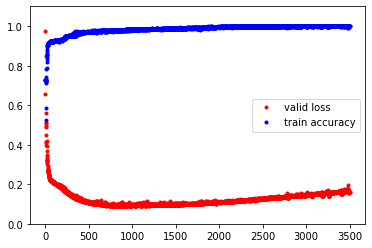

In [51]:
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='valid loss')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='train accuracy')

plt.legend()
plt.ylim(0, 1.1)  

plt.show()

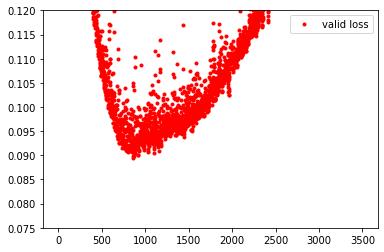

In [54]:
# valid loss가 감소하다가 증가하는(과적합 되는) 순간을 조금 더 확대해서 확인해보자
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='valid loss')
plt.legend()
plt.ylim(0.075, 0.12)  

plt.show()